# WebScraping with Selenium

This notebook shows how use selenium to scrape data from Indiegogo.com
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver

<a href="https://colab.research.google.com/drive/1_WyM24eXWf-pdcqJKCcsb1pWwnbEWRi8?authuser=2#scrollTo=VYfg3I_fSt6e"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 5.1MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" ntotebook. In our local notebook we can remove the `--headless` option.  


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
```



## [Advanced] How to use a proxy to hide our connection

RequestProxy is used to **hide** our connection...

In [ ]:
!pip install http-request-randomizer

In [ ]:
from http_request_randomizer.requests.proxy.requestProxy import RequestProxy
req_proxy = RequestProxy()
proxies = req_proxy.get_proxy_list()

2021-05-24 19:30:47,740 http_request_randomizer.requests.useragent.userAgent INFO     Using local file for user agents: /usr/local/lib/python3.7/dist-packages/http_request_randomizer/requests/proxy/../data/user_agents.txt
2021-05-24 19:30:47,743 root   DEBUG    === Initialized Proxy Parsers ===
2021-05-24 19:30:47,746 root   DEBUG    	 FreeProxy parser of 'http://free-proxy-list.net' with required bandwidth: '150' KBs
2021-05-24 19:30:47,749 root   DEBUG    	 PremProxy parser of 'https://premproxy.com/list/' with required bandwidth: '150' KBs
2021-05-24 19:30:47,751 root   DEBUG    	 SslProxy parser of 'https://www.sslproxies.org' with required bandwidth: '150' KBs
2021-05-24 19:30:47,753 root   DEBUG    =================================
2021-05-24 19:30:48,030 root   DEBUG    Added 300 proxies from FreeProxy
2021-05-24 19:30:48,379 http_request_randomizer.requests.parsers.PremProxyParser WARNING  Proxy Provider url failed: https://premproxy.com/list/
2021-05-24 19:30:48,380 http_reque

In [ ]:
ind = [] #int is list of Italy proxy
for proxy in proxies:
    if proxy.country == 'Italy':
        ind.append(proxy)

PROXY = ind[0].get_address()
print(PROXY)

print(ind[0].country)

213.203.177.218:3128
Italy


In [ ]:
# PROXY = '69.167.174.17:80'

In [ ]:
webdriver.DesiredCapabilities.CHROME['proxy']={
    "httpProxy":PROXY,
    "ftpProxy":PROXY,
    "sslProxy":PROXY,
    "proxyType":"MANUAL"
}

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


## First connection

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")

Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ration: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


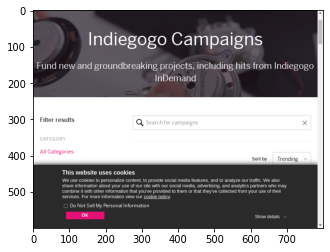

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [ ]:
print(wd.title)

Explore Crowdfunding Campaigns & Unique Products | Indiegogo


### First exercise with *Selenium*

Try it yourself... Print the contents of the page on the screen!

Complete the code and annotate the different behaviour. Try to use the attributes/methods applied to `wd`

- `page_source`
- `find_element_by_tag_name("body")`
- `find_element_by_tag_name("body").text`




In [ ]:
print(....)

### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements_by_css_selector`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [ ]:
list_titles = wd.find_elements_by_css_selector("div.discoverableCard-title")
print(len(list_titles))

12


In [ ]:
print(list_titles[0].text)

SIRUI 75mm Anamorphic Lens King of Portrait


### Exercise on *find_elements_by_css_selector*

Try to export the list of `div.discoverableCard-description` elements and show the content of the first element. Scope: get the description of the projects




In [ ]:
list_description = wd......("...")
print(len(list_description))

# Project List from Indiegogo

Let's begin to download the list of projects.

The list of projects is defined by the css selection rule
`discoverable-card`



In [ ]:
list_projects = wd.find_elements_by_css_selector("discoverable-card")
print(len(list_projects))

12


Gread! We find 12 project!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each project in the list with the attribute:


1.   url
2.   title
3.   description
4.   category
5.   progress



In [ ]:
import pprint
detail_projects = []
for project in list_projects:
    url = project.find_elements_by_css_selector("a")[0].get_attribute("href")
    title = ""
    description = ""
    category = ""
    project_id = ""
    balance = ""
    currency = ""
    image = ""
    progress = ""
    if(len(project.find_elements_by_css_selector(".discoverableCard-title")) > 0):
      title = project.find_elements_by_css_selector(".discoverableCard-title")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-description")) > 0):
      description = project.find_elements_by_css_selector(".discoverableCard-description")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-category")) > 0):
      category = project.find_elements_by_css_selector(".discoverableCard-category")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-balance")) > 0):
      balance = project.find_elements_by_css_selector(".discoverableCard-balance")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-percent")) > 0):
      progress = project.find_elements_by_css_selector(".discoverableCard-percent")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-unitsRaised")) > 0):
      currency = project.find_elements_by_css_selector(".discoverableCard-unitsRaised")[0].text
    project_id = url
    if(len(project.find_elements_by_css_selector(".discoverableCard-image")) > 0):
      image = project.find_elements_by_css_selector(".discoverableCard-image")[0].get_attribute("data-bgset")

    detail_projects.append({'url': url,
                            'image': image,
                            'title': title,
                            'description': description,
                            'category': category,
                            'balance': balance,
                            'currency': currency,
                            'progress': progress,
                            'project_id': project_id})

len(detail_projects)
pprint.pprint(detail_projects[0:5])

[{'balance': '$305,424 ',
  'category': 'CAMERA GEAR',
  'currency': 'USD raised',
  'description': 'Enhance the artistic appeal of your footage and immerse your '
                 'audience in an anamorphic world.',
  'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/gp5aurjxy2arn8nbflwu.jpg',
  'progress': '61,085%',
  'project_id': 'https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica',
  'title': 'SIRUI 75mm Anamorphic Lens King of Portrait',
  'url': 'https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica'},
 {'balance': '$209,162 ',
  'category': 'TRAVEL & OUTDOORS',
  'currency': 'USD raised',
  'description': 'The world’s smartest lighting helmet with 270° rear light, '
                 'patented fall detection and SOS alert',
  'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/isxwv6z9ejscsj1iegjy.jpg',
  'progress': '2,092%',


Now let's try downloading all the ads on the front page...
and then move on to the second.

First we define a `parse_project` function to make the code cleaner and to reuse the function.

In [ ]:
def parse_project(project):
  url = project.find_elements_by_css_selector("a")[0].get_attribute("href")
  title = ""
  description = ""
  category = ""
  project_id = ""
  balance = ""
  currency = ""
  progress = ""
  image = ""
  try:
    if(len(project.find_elements_by_css_selector(".discoverableCard-title")) > 0):
      title = project.find_elements_by_css_selector(".discoverableCard-title")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-description")) > 0):
      description = project.find_elements_by_css_selector(".discoverableCard-description")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-category")) > 0):
      category = project.find_elements_by_css_selector(".discoverableCard-category")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-balance")) > 0):
      balance = project.find_elements_by_css_selector(".discoverableCard-balance")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-percent")) > 0):
      progress = project.find_elements_by_css_selector(".discoverableCard-percent")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-unitsRaised")) > 0):
      currency = project.find_elements_by_css_selector(".discoverableCard-unitsRaised")[0].text
    if(len(project.find_elements_by_css_selector(".discoverableCard-image")) > 0):
      image = project.find_elements_by_css_selector(".discoverableCard-image")[0].get_attribute("data-bgset")
    project_id = url
  except:
    pass
  return {'url': url,
          'title': title,
          'image': image,
          'description': description,
          'category': category,
          'balance': balance,
          'currency': currency,
          'progress': progress,
          'project_id': project_id}


Here's how to download the first page of projects...

In [ ]:
detail_projects = []
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
wd.save_screenshot(f'screenshot.png')
list_projects = wd.find_elements_by_css_selector("discoverable-card")
for project in tqdm(list_projects):
  detail_projects.append(parse_project(project))

print(len(detail_projects))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



12


Have you seen the bookstore **tqdm**!
Find at this link all the documentation **https://github.com/tqdm/tqdm**:
is very useful to make our notebook more nice...

### How to end scraping?
Problem: When do we stop?

There are several ways. Some simpler and some more advanced:
- We can search inside the page for the ad number and divide it by 12
- We can check the status of the request (if (status_code == 200):... for a list of possible http status codes please check https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- We can check the number of ads found (if > 0...)
- Other more advanced techniques...

For example, in our case, let's go to verify the presence, or not, of the *Snow more* button inside the page. If present, we continue scraping, otherwise we stop.

Actually, we can also combine more than one of these techniques.



In [ ]:
import time
detail_projects = []
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
time.sleep(5)
wd.save_screenshot("check_browser.png")
if (len(wd.find_elements_by_id("CybotCookiebotDialogBodyButtonAccept")) > 0):
  print("Click cookie law button")
  wd.find_elements_by_id("CybotCookiebotDialogBodyButtonAccept")[0].click()
for num in tqdm(range(1,10)):
  items = (num - 1) * 12
  list_projects = wd.find_elements_by_css_selector(f"discoverable-card:nth-child(n+{items})")
  for project in list_projects:
    detail_projects.append(parse_project(project))
  if (len(wd.find_elements_by_css_selector(".i-cta-1")) > 0):
    wd.find_element_by_css_selector(".i-cta-1").click()
    time.sleep(3)
    wd.save_screenshot("check_browser.png")
  else:
    break



Click cookie law button


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [ ]:
print(len(detail_projects))
print(detail_projects[30:32])

116
[{'url': 'https://www.indiegogo.com/projects/tempmi-the-world-s-smallest-tritium-thermometer/pica', 'title': 'TEMPMi - The World’s Smallest Tritium Thermometer', 'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/allqsyi9mqmhovtw43jk.jpg', 'description': 'Contactless Measurement | Compact | Tritium | App Tracking | Measure for all | Android & iOS', 'category': 'HEALTH & FITNESS', 'balance': '$958,380 ', 'currency': 'HKD raised', 'progress': '3,828%', 'project_id': 'https://www.indiegogo.com/projects/tempmi-the-world-s-smallest-tritium-thermometer/pica'}, {'url': 'https://www.indiegogo.com/projects/sensitive-men-rising-the-documentary--2/pica', 'title': 'Sensitive Men Rising-The Documentary', 'image': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/c5h7sqpyf7ufthhnrqzm.jpg', 'description': 'This campaign is for the documentary film Sensitive Men Rising, the first film about sensitive men', 'category'

# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_projects)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

,url,title,image,description,category,balance,currency,progress,project_id
0,https://www.indiegogo.com/projects/sirui-75mm-...,SIRUI 75mm Anamorphic Lens King of Portrait,https://c1.iggcdn.com/indiegogo-media-prod-cld...,Enhance the artistic appeal of your footage an...,CAMERA GEAR,"$305,424",USD raised,"61,085%",https://www.indiegogo.com/projects/sirui-75mm-...
1,https://www.indiegogo.com/projects/livall-evo2...,LIVALL EVO21 Smart Helmet: 360 Active Protection,https://c1.iggcdn.com/indiegogo-media-prod-cld...,The world’s smartest lighting helmet with 270°...,TRAVEL & OUTDOORS,"$209,162",USD raised,"2,092%",https://www.indiegogo.com/projects/livall-evo2...
2,https://www.indiegogo.com/projects/me-mum-a-ne...,me.mum: a new method for predicting fertility,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"From a drop of saliva, me.mum analyzes hormone...",HEALTH & FITNESS,"€8,028",EUR raised,115%,https://www.indiegogo.com/projects/me-mum-a-ne...
3,https://www.indiegogo.com/projects/gamma-all-s...,GAMMA: All-Season Graphene Infused Heated Jacket,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"The ultimate heated jacket: Graphene-infused, ...",TRAVEL & OUTDOORS,"$19,499,995",HKD raised,"49,472%",https://www.indiegogo.com/projects/gamma-all-s...
4,https://www.indiegogo.com/projects/edge-the-fi...,EDGE - The First Modular Work From Home Kit,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"Your workstation, anywhere. Guaranteed to boos...",PRODUCTIVITY,"€332,588",EUR raised,"3,326%",https://www.indiegogo.com/projects/edge-the-fi...


The `.info()` method provides an indication of the structure and data of the `DataFrame`.

In [ ]:
ds_detail_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          116 non-null    object
 1   title        116 non-null    object
 2   image        116 non-null    object
 3   description  116 non-null    object
 4   category     116 non-null    object
 5   balance      116 non-null    object
 6   currency     116 non-null    object
 7   progress     116 non-null    object
 8   project_id   116 non-null    object
dtypes: object(9)
memory usage: 8.3+ KB


In [ ]:
ds_detail_projects.to_csv('ds_projects.csv')

# Indiegogo Project pages ###

Now, the goal is to navigate and download the details of each project and pictures of the houses.

**Pandas** provides the *.read_csv* method that allows you to upload in CSV format files within a DataFrame.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,image,description,category,balance,currency,progress
project_id,,,,,,,,,
https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica,0,https://www.indiegogo.com/projects/sirui-75mm-...,SIRUI 75mm Anamorphic Lens King of Portrait,https://c1.iggcdn.com/indiegogo-media-prod-cld...,Enhance the artistic appeal of your footage an...,CAMERA GEAR,"$305,424",USD raised,"61,085%"
https://www.indiegogo.com/projects/livall-evo21-smart-helmet-360-active-protection/pica,1,https://www.indiegogo.com/projects/livall-evo2...,LIVALL EVO21 Smart Helmet: 360 Active Protection,https://c1.iggcdn.com/indiegogo-media-prod-cld...,The world’s smartest lighting helmet with 270°...,TRAVEL & OUTDOORS,"$209,162",USD raised,"2,092%"
https://www.indiegogo.com/projects/me-mum-a-new-method-for-predicting-fertility/pica,2,https://www.indiegogo.com/projects/me-mum-a-ne...,me.mum: a new method for predicting fertility,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"From a drop of saliva, me.mum analyzes hormone...",HEALTH & FITNESS,"€8,028",EUR raised,115%
https://www.indiegogo.com/projects/gamma-all-season-graphene-infused-heated-jacket/pica,3,https://www.indiegogo.com/projects/gamma-all-s...,GAMMA: All-Season Graphene Infused Heated Jacket,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"The ultimate heated jacket: Graphene-infused, ...",TRAVEL & OUTDOORS,"$19,499,995",HKD raised,"49,472%"
https://www.indiegogo.com/projects/edge-the-first-modular-work-from-home-kit/pica,4,https://www.indiegogo.com/projects/edge-the-fi...,EDGE - The First Modular Work From Home Kit,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"Your workstation, anywhere. Guaranteed to boos...",PRODUCTIVITY,"€332,588",EUR raised,"3,326%"


***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,image,description,category,balance,currency,progress
project_id,,,,,,,,,
https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica,0,https://www.indiegogo.com/projects/sirui-75mm-...,SIRUI 75mm Anamorphic Lens King of Portrait,https://c1.iggcdn.com/indiegogo-media-prod-cld...,Enhance the artistic appeal of your footage an...,CAMERA GEAR,"$305,424",USD raised,"61,085%"
https://www.indiegogo.com/projects/livall-evo21-smart-helmet-360-active-protection/pica,1,https://www.indiegogo.com/projects/livall-evo2...,LIVALL EVO21 Smart Helmet: 360 Active Protection,https://c1.iggcdn.com/indiegogo-media-prod-cld...,The world’s smartest lighting helmet with 270°...,TRAVEL & OUTDOORS,"$209,162",USD raised,"2,092%"
https://www.indiegogo.com/projects/me-mum-a-new-method-for-predicting-fertility/pica,2,https://www.indiegogo.com/projects/me-mum-a-ne...,me.mum: a new method for predicting fertility,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"From a drop of saliva, me.mum analyzes hormone...",HEALTH & FITNESS,"€8,028",EUR raised,115%
https://www.indiegogo.com/projects/gamma-all-season-graphene-infused-heated-jacket/pica,3,https://www.indiegogo.com/projects/gamma-all-s...,GAMMA: All-Season Graphene Infused Heated Jacket,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"The ultimate heated jacket: Graphene-infused, ...",TRAVEL & OUTDOORS,"$19,499,995",HKD raised,"49,472%"
https://www.indiegogo.com/projects/edge-the-first-modular-work-from-home-kit/pica,4,https://www.indiegogo.com/projects/edge-the-fi...,EDGE - The First Modular Work From Home Kit,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"Your workstation, anywhere. Guaranteed to boos...",PRODUCTIVITY,"€332,588",EUR raised,"3,326%"


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for project_id, project in ds_detail_projects.head().iterrows():
    time.sleep(10)
    link = project["url"]
    print(link)
    wd.set_window_size(1920, 1080)
    wd.get(link)
    try:
      WebDriverWait(wd, 10).until(
          EC.element_to_be_clickable((By.ID, "div.basicsBackerActions"))
      )
    except:
      continue

    wd.save_screenshot(f'screenshot_1.png')
    backers = wd.find_elements_by_css_selector(".basicsGoalProgress-claimedOrBackers")[0].text
    goal = wd.find_elements_by_css_selector(".basicsGoalProgress-progressDetails-detailsGoal-goalPercentageOrInitiallyRaised")[0].text
    left = wd.find_elements_by_css_selector(".basicsGoalProgress-progressDetails-detailsTimeLeft")[0].text
    location = wd.find_elements_by_css_selector(".basicsCampaignOwner-details-city")[0].text
    owner = wd.find_elements_by_css_selector(".campaignOwnerName-tooltip")[0].text
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'left': left,
                    'owner': owner,
                    'location': location})
  
len(details)
pprint.pprint(details)


https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica
https://www.indiegogo.com/projects/livall-evo21-smart-helmet-360-active-protection/pica
https://www.indiegogo.com/projects/me-mum-a-new-method-for-predicting-fertility/pica
https://www.indiegogo.com/projects/gamma-all-season-graphene-infused-heated-jacket/pica
https://www.indiegogo.com/projects/edge-the-first-modular-work-from-home-kit/pica
[]


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
ds_detail_projects = ds_detail_projects.head(n = 100)
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
    time.sleep(1)
    link = project["url"]
    backers = 0
    goal = 0
    left = 0
    location = ""
    owner = ""
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      backers = wd.find_elements_by_css_selector(".basicsGoalProgress-claimedOrBackers")[0].text
      goal = wd.find_elements_by_css_selector(".basicsGoalProgress-progressDetails-detailsGoal-goalPercentageOrInitiallyRaised")[0].text
      left = wd.find_elements_by_css_selector(".basicsGoalProgress-progressDetails-detailsTimeLeft")[0].text
      location = wd.find_elements_by_css_selector(".basicsCampaignOwner-details-city")[0].text
      owner = wd.find_elements_by_css_selector(".campaignOwnerName-tooltip")[0].text
    except Exception as e:
      print(e)
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'left': left,
                    'owner': owner,
                    'location': location})
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range



In [ ]:
print(len(details))
pprint.pprint(details[0:4])

100
[{'backers': '436 backers',
  'goal': '61084% of $500',
  'left': '30 days left',
  'location': 'Verona, United States',
  'owner': 'SIRUI USA',
  'project_id': 'https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica'},
 {'backers': '1,630 backers',
  'goal': '2091% of $10,000',
  'left': '19 days left',
  'location': 'San Ramon, United States',
  'owner': 'LIVALL Riding',
  'project_id': 'https://www.indiegogo.com/projects/livall-evo21-smart-helmet-360-active-protection/pica'},
 {'backers': '163 backers',
  'goal': '114% of $8,538',
  'left': '24 days left',
  'location': 'Zagreb, Croatia',
  'owner': 'Maja Bujas',
  'project_id': 'https://www.indiegogo.com/projects/me-mum-a-new-method-for-predicting-fertility/pica'},
 {'backers': 'by 7,232 backers',
  'goal': '$2,484,603 USD by 7,161 backers',
  'left': 0,
  'location': '',
  'owner': '',
  'project_id': 'https://www.indiegogo.com/projects/gamma-all-season-graphene-infused-heated-jacket/pica'}]


Store the data with *pandas*

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("project_id")
ds_details.head()

,project_id,backers,goal,left,owner,location
0,https://www.indiegogo.com/projects/sirui-75mm-...,436 backers,61084% of $500,30 days left,SIRUI USA,"Verona, United States"
1,https://www.indiegogo.com/projects/livall-evo2...,"1,630 backers","2091% of $10,000",19 days left,LIVALL Riding,"San Ramon, United States"
2,https://www.indiegogo.com/projects/me-mum-a-ne...,163 backers,"114% of $8,538",24 days left,Maja Bujas,"Zagreb, Croatia"
3,https://www.indiegogo.com/projects/gamma-all-s...,"by 7,232 backers","$2,484,603 USD by 7,161 backers",0,,
4,https://www.indiegogo.com/projects/edge-the-fi...,"6,322 backers","3325% of $12,197",10 days left,Rolling Square,"Lugano, Switzerland"


In [ ]:
ds_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  100 non-null    object
 1   backers     100 non-null    object
 2   goal        100 non-null    object
 3   left        100 non-null    object
 4   owner       100 non-null    object
 5   location    100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [ ]:
ds_details.to_csv("ds_project_details.csv")

# Indiegogo Project images


Now we're going to download Indiegogo images for each project.

Our goal is to create a dataset of images and a `Dataframe` composed by:
- `project_id`
- `image_id`

We will use the library `requests`.

The `requests` library is python library for making HTTP requests.
It abstracts the complexities of making requests behind a simple API so that you can focus on interacting with services and consuming data in your application.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,image,description,category,balance,currency,progress
project_id,,,,,,,,,
https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica,0,https://www.indiegogo.com/projects/sirui-75mm-...,SIRUI 75mm Anamorphic Lens King of Portrait,https://c1.iggcdn.com/indiegogo-media-prod-cld...,Enhance the artistic appeal of your footage an...,CAMERA GEAR,"$305,424",USD raised,"61,085%"
https://www.indiegogo.com/projects/livall-evo21-smart-helmet-360-active-protection/pica,1,https://www.indiegogo.com/projects/livall-evo2...,LIVALL EVO21 Smart Helmet: 360 Active Protection,https://c1.iggcdn.com/indiegogo-media-prod-cld...,The world’s smartest lighting helmet with 270°...,TRAVEL & OUTDOORS,"$209,162",USD raised,"2,092%"
https://www.indiegogo.com/projects/me-mum-a-new-method-for-predicting-fertility/pica,2,https://www.indiegogo.com/projects/me-mum-a-ne...,me.mum: a new method for predicting fertility,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"From a drop of saliva, me.mum analyzes hormone...",HEALTH & FITNESS,"€8,028",EUR raised,115%
https://www.indiegogo.com/projects/gamma-all-season-graphene-infused-heated-jacket/pica,3,https://www.indiegogo.com/projects/gamma-all-s...,GAMMA: All-Season Graphene Infused Heated Jacket,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"The ultimate heated jacket: Graphene-infused, ...",TRAVEL & OUTDOORS,"$19,499,995",HKD raised,"49,472%"
https://www.indiegogo.com/projects/edge-the-first-modular-work-from-home-kit/pica,4,https://www.indiegogo.com/projects/edge-the-fi...,EDGE - The First Modular Work From Home Kit,https://c1.iggcdn.com/indiegogo-media-prod-cld...,"Your workstation, anywhere. Guaranteed to boos...",PRODUCTIVITY,"€332,588",EUR raised,"3,326%"


In [ ]:
import time
import requests

detail_projects = []
list_images = []
num = 0
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  num = num + 1
  try:
    list_images.append({"project_id": project_id,
                        "img_file": "img_" + str(num) + ".jpg"})
    src = project['image']
    img_file = requests.get(src, stream=True)
    if img_file.status_code == 200:
      with open("/content/images/img_" + str(num) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [ ]:
print(len(list_images))

116


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


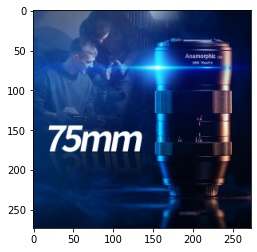

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

,project_id,img_file
0,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg
1,https://www.indiegogo.com/projects/livall-evo2...,img_2.jpg
2,https://www.indiegogo.com/projects/me-mum-a-ne...,img_3.jpg
3,https://www.indiegogo.com/projects/gamma-all-s...,img_4.jpg
4,https://www.indiegogo.com/projects/edge-the-fi...,img_5.jpg


In [ ]:
ds_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   project_id  116 non-null    object
 1   img_file    116 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [ ]:
ds_images.to_csv("ds_images.csv")


In [ ]:
!zip -r "/content/images.zip" "/content/images/"


updating: content/images/ (stored 0%)
updating: content/images/img_47.jpg (deflated 0%)
updating: content/images/img_20.jpg (deflated 0%)
updating: content/images/img_29.jpg (deflated 1%)
updating: content/images/img_14.jpg (deflated 0%)
updating: content/images/img_5.jpg (deflated 2%)
updating: content/images/img_17.jpg (deflated 0%)
updating: content/images/img_44.jpg (deflated 1%)
updating: content/images/img_27.jpg (deflated 0%)
updating: content/images/img_36.jpg (deflated 1%)
updating: content/images/img_12.jpg (deflated 2%)
updating: content/images/img_30.jpg (deflated 2%)
updating: content/images/img_40.jpg (deflated 4%)
updating: content/images/img_2.jpg (deflated 0%)
updating: content/images/img_23.jpg (deflated 4%)
updating: content/images/img_6.jpg (deflated 0%)
updating: content/images/img_16.jpg (deflated 0%)
updating: content/images/img_35.jpg (deflated 0%)
updating: content/images/img_51.jpg (deflated 0%)
updating: content/images/img_7.jpg (deflated 2%)
updating: conten

# API

Let's see how to use the **requests** library to hook APIs provided by our suppliers or colleagues.

## Crarifai

Let's try the services provided by Clarifai to increase the data we have available.


First, we need to install the `crarifai` python library.
For more details, please visit https://github.com/Clarifai/clarifai-python-grpc

To install the API client:


```
pip install clarifai-grpc
```






In [ ]:
##############################################################################
# Installation
##############################################################################

!pip install clarifai-grpc --upgrade



Requirement already up-to-date: clarifai-grpc in /usr/local/lib/python3.7/dist-packages (7.4.0)


In [ ]:
##############################################################################
# Initialize client
##############################################################################

from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

channel = ClarifaiChannel.get_grpc_channel()

# Note: You can also use a secure (encrypted) ClarifaiChannel.get_grpc_channel() however
# it is currently not possible to use it with the latest gRPC version

stub = service_pb2_grpc.V2Stub(channel)

# This will be used by every Clarifai endpoint call.
metadata = (('authorization', 'Key 05a84c8d24f44480bb93b289ac5a8e53'),)

We will use the `predict_by_filename` method to obtain the **concepts** within the page.


In [ ]:
with open("/content/images/img_1.jpg", "rb") as f:
    file_bytes = f.read()

post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(
        model_id="aaa03c23b3724a16a56b629203edc62c",
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        base64=file_bytes
                    )
                )
            )
        ]
    ),
    metadata=metadata
)

if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
    raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)


In [ ]:
post_model_outputs_response

status {
  code: SUCCESS
  description: "Ok"
  req_id: "f50085bc0c4d4eeea59848d67e706e2e"
}
outputs {
  id: "563b5c2c60914178aa3e84ac9c43233c"
  status {
    code: SUCCESS
    description: "Ok"
  }
  created_at {
    seconds: 1621893825
    nanos: 296190306
  }
  model {
    id: "aaa03c23b3724a16a56b629203edc62c"
    name: "general"
    created_at {
      seconds: 1457543499
      nanos: 608845000
    }
    app_id: "main"
    output_info {
      output_config {
      }
      message: "Show output_info with: GET /models/{model_id}/output_info"
      type: "concept"
      type_ext: "concept"
      fields_map {
        fields {
          key: "concepts"
          value {
            string_value: "softmax"
          }
        }
      }
    }
    model_version {
      id: "aa7f35c01e0642fda5cf400f543e7c40"
      created_at {
        seconds: 1520370624
        nanos: 454834000
      }
      status {
        code: MODEL_TRAINED
        description: "Model is trained and ready"
      }
     

What type of data does that give us back?
Let's have a look!

In [ ]:
# Since we have one input, one output will exist here.
output = post_model_outputs_response.outputs[0]

print("Predicted concepts:")
for concept in output.data.concepts:
    print("%s %.2f" % (concept.name, concept.value))

Predicted concepts:
illuminated 1.00
lens 0.99
discovery 0.99
technology 0.99
bright 0.98
zoom 0.97
no person 0.96
dark 0.96
nightlife 0.96
science 0.95
optometry 0.94
electronics 0.94
research 0.94
creativity 0.93
equipment 0.93
futuristic 0.92
eyesight 0.92
projection 0.91
glazed 0.91
glass items 0.89


In [ ]:
output

id: "563b5c2c60914178aa3e84ac9c43233c"
status {
  code: SUCCESS
  description: "Ok"
}
created_at {
  seconds: 1621893825
  nanos: 296190306
}
model {
  id: "aaa03c23b3724a16a56b629203edc62c"
  name: "general"
  created_at {
    seconds: 1457543499
    nanos: 608845000
  }
  app_id: "main"
  output_info {
    output_config {
    }
    message: "Show output_info with: GET /models/{model_id}/output_info"
    type: "concept"
    type_ext: "concept"
    fields_map {
      fields {
        key: "concepts"
        value {
          string_value: "softmax"
        }
      }
    }
  }
  model_version {
    id: "aa7f35c01e0642fda5cf400f543e7c40"
    created_at {
      seconds: 1520370624
      nanos: 454834000
    }
    status {
      code: MODEL_TRAINED
      description: "Model is trained and ready"
    }
    visibility {
      gettable: PUBLIC
    }
    app_id: "main"
    user_id: "clarifai"
  }
  display_name: "General"
  user_id: "clarifai"
  input_info {
    fields_map {
      fields {
   

Now let's go and identify all the concepts for each image of each project.

In [ ]:
ds_images = pd.read_csv("ds_images.csv", index_col="project_id")

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    with open('/content/images/' + image['img_file'], "rb") as f:
      file_bytes = f.read()
    response = stub.PostModelOutputs(
        service_pb2.PostModelOutputsRequest(
            model_id="aaa03c23b3724a16a56b629203edc62c",
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    ).outputs[0]
    if(response.status.description == "Ok"):
      for concept in response.data.concepts:
          name = concept.name
          value = concept.value
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

print(len(img_details))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



2320


In [ ]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

,project_id,image,name,value
0,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg,illuminated,0.995933
1,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg,lens,0.994841
2,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg,discovery,0.990271
3,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg,technology,0.987940
4,https://www.indiegogo.com/projects/sirui-75mm-...,img_1.jpg,bright,0.979631


In [ ]:
ds_img_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   project_id  2320 non-null   object 
 1   image       2320 non-null   object 
 2   name        2320 non-null   object 
 3   value       2320 non-null   float64
dtypes: float64(1), object(3)
memory usage: 72.6+ KB


In [ ]:
ds_img_details.to_csv('ds_img_details.csv')

# Geocoding

What's geocoding?



Let's try to geolocalize the projects...

In [ ]:
import requests
import json
import pprint
import pandas as pd
from tqdm import tqdm_notebook as tqdm

address = "New Orleans, LA"
key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
response = requests.get(geocode_url)

import json
geo = json.loads(response.text)
pprint.pprint(response.text)

('{"info":{"statuscode":0,"copyright":{"text":"\\u00A9 2021 MapQuest, '
 'Inc.","imageUrl":"http://api.mqcdn.com/res/mqlogo.gif","imageAltText":"\\u00A9 '
 '2021 MapQuest, '
 'Inc."},"messages":[]},"options":{"maxResults":-1,"thumbMaps":true,"ignoreLatLngInput":false},"results":[{"providedLocation":{"location":"New '
 'Orleans, '
 'LA"},"locations":[{"street":"","adminArea6":"","adminArea6Type":"Neighborhood","adminArea5":"New '
 'Orleans","adminArea5Type":"City","adminArea4":"Orleans '
 'Parish","adminArea4Type":"County","adminArea3":"LA","adminArea3Type":"State","adminArea1":"US","adminArea1Type":"Country","postalCode":"","geocodeQualityCode":"A5XAX","geocodeQuality":"CITY","dragPoint":false,"sideOfStreet":"N","linkId":"282038950","unknownInput":"","type":"s","latLng":{"lat":29.950621,"lng":-90.074948},"displayLatLng":{"lat":29.950621,"lng":-90.074948},"mapUrl":"http://www.mapquestapi.com/staticmap/v5/map?key=r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz&type=map&size=225,160&locations=29.950621,

In [ ]:
print(geo['results'][0]['locations'][0]['latLng']['lat'])
print(geo['results'][0]['locations'][0]['latLng']['lng'])

29.950621
-90.074948


In [ ]:
ds_projects = pd.read_csv("ds_project_details.csv", index_col="project_id")
ds_projects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, https://www.indiegogo.com/projects/sirui-75mm-anamorphic-lens-king-of-portrait/pica to https://www.indiegogo.com/projects/aaron-sinclair-nature-album-trees-and-turtles/pica
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   backers     100 non-null    object
 2   goal        100 non-null    object
 3   left        100 non-null    object
 4   owner       64 non-null     object
 5   location    64 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


In [ ]:
ds_projects = pd.read_csv("ds_project_details.csv", index_col="project_id")

import time
project_location = []
for project_id, project in tqdm(ds_projects.iterrows(), total=ds_projects.shape[0]):
  address = project['location']
  if(address is None):
    print(str(project_id) + "- " + project['location'])
  else:
    key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
    try:
      geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
      response = requests.get(geocode_url)
      if(response.status_code == 200):
        geo = json.loads(response.text)
        lat = geo['results'][0]['locations'][0]['latLng']['lat']
        lng = geo['results'][0]['locations'][0]['latLng']['lng']
        project_location.append({
              "project_id": project_id,
              "lat": lat,
              "lng": lng
            })
    except Exception as e:
      print(e)
    

print(len(project_location))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



100


In [ ]:
import pandas as pd
ds_project_location = pd.DataFrame(project_location)
ds_project_location.set_index("project_id")
ds_project_location.head(20)

,project_id,lat,lng
0,https://www.indiegogo.com/projects/sirui-75mm-...,40.504004,-79.843219
1,https://www.indiegogo.com/projects/livall-evo2...,37.764907,-121.951061
2,https://www.indiegogo.com/projects/me-mum-a-ne...,45.813155,15.977030
3,https://www.indiegogo.com/projects/gamma-all-s...,18.784635,100.777315
4,https://www.indiegogo.com/projects/edge-the-fi...,46.005010,8.952028
5,https://www.indiegogo.com/projects/gosun-chill...,39.104427,-84.513808
6,https://www.indiegogo.com/projects/olive-pro-2...,18.784635,100.777315
7,https://www.indiegogo.com/projects/oyeet-nex-p...,22.264412,114.167061
8,https://www.indiegogo.com/projects/aawireless/...,18.784635,100.777315
9,https://www.indiegogo.com/projects/kylgor-in-t...,44.164013,-77.382466


In [ ]:
ds_project_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   project_id  100 non-null    object 
 1   lat         100 non-null    float64
 2   lng         100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
ds_project_location.to_csv('ds_project_location.csv')

# Use API to get data from Indiegogo

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [43]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

import requests
from tqdm import tqdm_notebook as tqdm
import pandas
import pprint
import pandas as pd
import json

In [6]:
project_list = []
for page in tqdm(range(1, 50)):
  payload = {"sort": "most_funded",
            "category_main": None,
            "category_top_level": "Creative Works",
            "project_timing": "all",
            "project_type": "campaign",
            "tags":[],
            "page_num": page,
            "per_page": 100,
            "q": ""}
  r = requests.post('https://www.indiegogo.com/private_api/discover',
                  headers={'Content-type': 'application/json; charset=UTF-8', "User-Agent": "curl/7.64.1"},
                  json=payload)
  my_projects = r.json()['response']['discoverables']
  project_list.extend(my_projects)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [7]:
len(project_list)

4900

In [8]:
print(project_list[0:2])

[{'bullet_point': None, 'category': 'Film', 'category_url': '/explore/film', 'clickthrough_url': '/projects/super-troopers-2', 'close_date': '2015-04-24T23:59:59-07:00', 'currency': 'USD', 'funds_raised_amount': 4617223, 'funds_raised_percent': 2.081839, 'image_url': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_273,w_273/ihngkgslmmpbwcaxurio.jpg', 'is_indemand': False, 'is_pre_launch': False, 'offered_by': None, 'open_date': '2015-03-24T10:00:57-07:00', 'perk_goal_percentage': None, 'perks_claimed': None, 'price_offered': None, 'price_retail': None, 'product_stage': None, 'project_id': 1166581, 'project_type': 'campaign', 'tagline': 'The #SuperTroopers2 campaign is over, but the movie will be out in theaters on 4/20/18!', 'tags': ['other'], 'title': 'Super Troopers 2'}, {'bullet_point': None, 'category': 'Web Series & TV Shows', 'category_url': '/explore/web-series-tv-shows', 'clickthrough_url': '/projects/con-man', 'close_date': '2015-04-10T23:59:59-07:

In [9]:
import pandas as pd
ds_detail_projects = pd.DataFrame(project_list)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,tagline,tags,title
0,None,Film,/explore/film,/projects/super-troopers-2,2015-04-24T23:59:59-07:00,USD,4617223,2.081839,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,None,2015-03-24T10:00:57-07:00,NaN,NaN,None,None,None,1166581,campaign,"The #SuperTroopers2 campaign is over, but the ...",[other],Super Troopers 2
1,None,Web Series & TV Shows,/explore/web-series-tv-shows,/projects/con-man,2015-04-10T23:59:59-07:00,USD,3156178,7.347459,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,None,2015-03-10T14:48:01-07:00,NaN,NaN,None,None,None,1143140,campaign,A new comedy from Alan Tudyk and Nathan Fillio...,[other],Con Man
2,None,Photography,/explore/photography,/projects/the-camera-pack-peter-mckinnon-x-nom...,2019-11-14T23:59:59-08:00,USD,2677592,22.861930,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,None,2019-11-13T23:59:59-08:00,NaN,NaN,None,None,None,2558245,campaign,A Functional Camera Pack for all types of trav...,"[backpacks, design, luggage, professional]",The Camera Pack: Peter McKinnon X NOMATIC
3,None,Writing & Publishing,/explore/writing-publishing,/projects/the-book--28,2021-01-04T23:59:59-08:00,USD,2621668,293.336625,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,None,2021-01-03T23:59:59-08:00,NaN,NaN,None,None,None,2650630,campaign,The Ultimate Guide To Rebuilding A Civilizatio...,"[books, burning man, design]",The Book
4,None,Film,/explore/film,/projects/code-8-a-film-from-robbie-stephen-amell,2016-04-23T23:59:59-07:00,USD,2501972,8.600755,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,None,2016-03-22T08:06:31-07:00,NaN,NaN,None,None,None,1676513,campaign,Help Robbie & Stephen Amell make their first f...,[robots],Code 8 - a film from Robbie & Stephen Amell


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
ds_detail_projects.to_csv("/content/drive/MyDrive/indiegogo/1_ds_project_details_full.csv")

In [6]:
ds_detail_projects = pd.read_csv("/content/drive/MyDrive/indiegogo/1_ds_project_details_full.csv", index_col="project_id")


In [7]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
import time
project_location = []
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
  try:
    project_url = project["clickthrough_url"]
    wd.get(f"https://www.indiegogo.com/{project_url}")
    address = wd.find_elements_by_css_selector(".basicsCampaignOwner-details-city")[0].text
    geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
    response = requests.get(geocode_url)
    if (response.status_code == 200):
      geo = json.loads(response.text)
      lat = geo['results'][0]['locations'][0]['latLng']['lat']
      lng = geo['results'][0]['locations'][0]['latLng']['lng']
      project_location.append({
            "project_id": project_id,
            "lat": lat,
            "lng": lng
          })
  except Exception as e:
    print(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


In [ ]:
# project_location

In [ ]:
print(len(project_location))

In [ ]:
import pandas as pd
ds_project_location = pd.DataFrame(project_location)
ds_project_location.set_index("project_id")
ds_project_location.head(20)

In [ ]:
ds_project_location.to_csv("/content/drive/MyDrive/indiegogo/2_ds_project_location_full.csv")

In [ ]:
!mkdir /content/drive/MyDrive/indiegogo/images/

In [ ]:
detail_projects = []
list_images = []
num = 0
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  num = num + 1
  try:
    list_images.append({"project_id": project_id,
                        "img_file": "img_" + str(num) + ".jpg"})
    src = project['image_url']
    img_file = requests.get(src, stream=True)
    if img_file.status_code == 200:
      with open("/content/drive/MyDrive/indiegogo/images/img_" + str(num) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)

In [ ]:
# list_images

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

In [ ]:
ds_images.to_csv("/content/drive/MyDrive/indiegogo/3_ds_images_full.csv")

In [ ]:
# !pip install clarifai-grpc --upgrade

In [ ]:
from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

channel = ClarifaiChannel.get_grpc_channel()

# Note: You can also use a secure (encrypted) ClarifaiChannel.get_grpc_channel() however
# it is currently not possible to use it with the latest gRPC version

stub = service_pb2_grpc.V2Stub(channel)

# This will be used by every Clarifai endpoint call.
metadata = (('authorization', 'Key 41a0bb727c0c462d8cd09aa359fa9649'),)

In [ ]:
!zip -r "/content/drive/MyDrive/indiegogo/images_full.zip" "/content/drive/MyDrive/indiegogo/images/"

In [ ]:
ds_images = pd.read_csv("/content/drive/MyDrive/indiegogo/3_ds_images_full.csv", index_col="project_id")
ds_images.head()

In [ ]:

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    with open('/content/drive/MyDrive/indiegogo/images/' + image['img_file'], "rb") as f:
      file_bytes = f.read()
    response = stub.PostModelOutputs(
        service_pb2.PostModelOutputsRequest(
            model_id="aaa03c23b3724a16a56b629203edc62c",
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    ).outputs[0]
    print(response.status)
    if(response.status.description == "Ok"):
      for concept in response.data.concepts:
          name = concept.name
          value = concept.value
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

In [ ]:
# img_details

In [ ]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

In [ ]:
ds_img_details.to_csv('/content/drive/MyDrive/indiegogo/4_ds_img_details_full.csv')